In [1]:
import sys
import os
import json
sys.path.append(os.getcwd())

from environment import Environment

env = Environment()

import importlib
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

# from experiment import Experiment
# from dataset import Reader
# import toolbox as tbx

# from models import metrics


environment loaded


In [2]:
evaluation_root = os.path.join(env.EXPERIMENT_ROOT, '_evaluation')


In [3]:
columnnames = ['loss',
               'mask',
               'dataset',
               'model']

data_frames = []
for filename in os.listdir(evaluation_root):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        filepath = os.path.join(evaluation_root, filename)
        df = pd.read_csv(filepath)
        
        # Split the filename by "_"
        file_values = filename[:-14].split("_")
        
        # Add each value from the filename as a new column in the DataFrame
        for i, value in enumerate(file_values):
            df[columnnames[i]] = value        
        # Append the DataFrame to the list
        data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True).drop('index', axis=1)

In [139]:
modelorder = [
              'sis2',
              'sis2-1',
              'sis2-2',
              'sis2-3',# bad results alt12 masked and unmasked
              'sis3',
              'sis3-1',
              'sis3-2',
              'sis3-3',# cur: bad - wait for alt12 results
              'sis3-a',
              'sis3-b',
              'sis3-c',
              'sis3-d',
              'sis4',
              'sis5',
              'sis6',
              'sis10',
              'sis11',
              'sis12',
              'sis22',
              'sis23',# outlyer values, recheck after all results
              'sis25',
              'sis26',
              'dmnet',
              'dsen2w',
              'pix2pix',
              'psgan',
              'srgan',# outlyer values, recheck after all results
              'srs3',
              'tarsgan'
              ]

metrics = {'SAM': True,
           'RMSE': True,
           'ERGAS': True,

           'SSIM': False,
           'CC': False,
           'sCC': False,
           'HPSI': False,
           'UIQC': False,
           'PSNR': False}


In [140]:
def boxplot(combined_df, metric='SSIM', x='model', dataset='cur', inmask:bool=None, groupby:str=None):
    fig, ax = plt.subplots(figsize=(15, 7))

    data = combined_df
    if inmask is not None:
        if inmask:
            data = data[data['mask'] == 'inmask']
        else:
            data = data[data['mask'] == 'notinmask']

    if dataset is not None:
        data = data[data['dataset'] == dataset]
    
    sns.boxplot(data=data, x=x, y=metric, hue=groupby, ax=ax, order=modelorder)

    # Set labels and title
    ax.set_xlabel(x)
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} per {x}')
    plt.xticks(rotation=70)  # Rotate the x-axis labels for better readability
    plt.show()


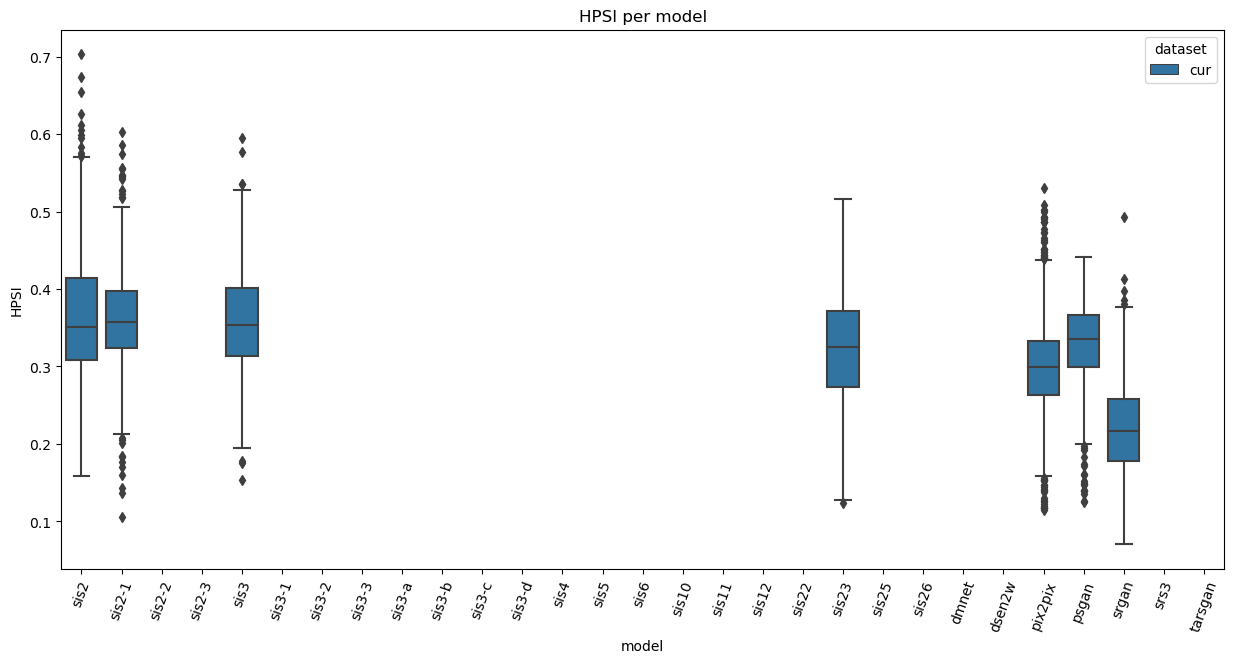

In [142]:
boxplot(combined_df, x='model', metric='HPSI', inmask=False, dataset='cur', groupby='dataset')

In [145]:
grouped_df = combined_df.groupby(columnnames).agg(["mean", "std"]).reset_index()
grouped_df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in grouped_df.columns.values]

grouped_df

,loss,mask,dataset,model,SAM_mean,SAM_std,sCC_mean,sCC_std,CC_mean,CC_std,...,SSIM_mean,SSIM_std,PSNR_mean,PSNR_std,RMSE_mean,RMSE_std,ERGAS_mean,ERGAS_std,UIQC_mean,UIQC_std
0,s5lw,inmask,alt12,pix2pix,0.022189,0.017065,0.691902,0.153125,0.505617,0.311204,...,0.343757,0.134589,16.960174,3.225748,0.000482,4.081824e-04,3.338132,3.192385,0.372054,0.237524
1,s5lw,inmask,alt12,sis10,0.023916,0.010572,0.709033,0.136239,0.529200,0.296743,...,0.418489,0.159679,18.268944,3.287916,0.000454,3.744524e-04,3.268403,3.148104,0.390663,0.225035
2,s5lw,inmask,alt12,sis2,0.026705,0.012575,0.764879,0.115484,0.575183,0.288389,...,0.424482,0.165346,17.418375,4.144822,0.000416,3.811067e-04,3.000583,3.293289,0.429226,0.217656
3,s5lw,inmask,alt12,sis2-1,0.015230,0.013106,0.742151,0.122929,0.578864,0.299492,...,0.420741,0.162220,17.908521,4.007879,0.000395,3.887109e-04,2.838919,3.262221,0.430816,0.226685
4,s5lw,inmask,alt12,sis2-2,0.023147,0.011186,0.754189,0.126792,0.583968,0.298629,...,0.413259,0.149240,15.724566,3.733680,0.000409,3.586615e-04,2.973752,3.113773,0.433524,0.225843
5,s5lw,inmask,alt12,sis3-1,0.020857,0.008775,0.778151,0.116422,0.598417,0.279134,...,0.434471,0.171286,18.663877,3.502362,0.000406,3.674599e-04,2.933003,3.043237,0.444210,0.212609
6,s5lw,inmask,alt12,sis3-2,0.765162,0.158311,0.039682,0.081632,0.026623,0.084066,...,0.403086,0.177375,12.835317,3.538152,0.025115,3.995967e-03,15527.234227,127271.998227,0.002582,0.033136
7,s5lw,inmask,alt12,sis3-3,0.023801,0.008602,0.740692,0.114703,0.569984,0.304725,...,0.407410,0.153972,18.171095,3.547222,0.000393,3.275505e-04,2.754602,2.697487,0.423816,0.230963
8,s5lw,inmask,alt12,sis3-a,0.017096,0.011046,0.727600,0.129026,0.557667,0.307933,...,0.361843,0.142531,17.789463,3.320512,0.000406,3.667536e-04,2.957517,3.188194,0.414185,0.233451
9,s5lw,inmask,alt12,sis3-b,0.014104,0.009242,0.780802,0.109362,0.612717,0.280049,...,0.439929,0.167211,19.634788,3.689602,0.000375,3.234324e-04,2.699434,2.725500,0.454862,0.213029


In [146]:
def quintile(metric:str, num_quint:int=5, masked:bool=None, dataset:str=None, returndf:bool=False):
    summary_df = grouped_df.copy()
    if masked is not None:
        if masked:
            summary_df = summary_df[summary_df['mask'] == 'inmask']
        else:
            summary_df = summary_df[summary_df['mask'] == 'notinmask']
    if dataset is not None:
        summary_df = summary_df[summary_df['dataset'] == dataset]
    
    if metrics[metric]:
        min = summary_df[f'{metric}_mean'].min()
        step = (summary_df[f'{metric}_mean'].max() - summary_df[f'{metric}_mean'].min()) / (num_quint - 1)
    else:
        min = summary_df[f'{metric}_mean'].max()
        step = (summary_df[f'{metric}_mean'].min() - summary_df[f'{metric}_mean'].max()) / (num_quint - 1)

    def calculate_quintile(row) -> int:
        try:
            return int((row[f'{metric}_mean'] - min) / step) + 1
        except:
            return None
        
    result = summary_df.apply(calculate_quintile, axis=1)

    if returndf:
        summary_df[f'{metric}_quint'] = result
        return summary_df[[f'model','mask','dataset',f'{metric}_mean',f'{metric}_std',f'{metric}_quint']].sort_values(f'{metric}_mean', ascending=metrics[metric])
    else:
        return result


In [148]:
quintile('HPSI', masked=False, dataset=None, returndf=True)

,model,mask,dataset,HPSI_mean,HPSI_std,HPSI_quint
22,sis3-2,notinmask,alt12,0.502799,0.092180,1.0
23,sis3-a,notinmask,alt12,0.501806,0.097827,1.0
18,pix2pix,notinmask,alt12,0.497978,0.103177,1.0
20,sis2-3,notinmask,alt12,0.465726,0.078550,1.0
26,sis6,notinmask,alt12,0.445582,0.080187,1.0
24,sis3-b,notinmask,alt12,0.434205,0.107310,1.0
25,sis5,notinmask,alt12,0.427657,0.073401,2.0
21,sis3-1,notinmask,alt12,0.378441,0.107030,2.0
31,sis2,notinmask,cur,0.364418,0.077178,2.0
32,sis2-1,notinmask,cur,0.360798,0.064672,3.0


In [144]:
combined_df.head(50)

,SAM,sCC,CC,HPSI,SSIM,PSNR,RMSE,ERGAS,UIQC,loss,mask,dataset,model
0,0.016426,0.814831,0.786294,0.470593,0.414589,14.858718,0.000403,2.567015,0.589540,s5lw,inmask,alt12,pix2pix
1,0.013850,0.611530,0.460570,0.515881,0.272843,16.966601,0.000256,1.618224,0.339640,s5lw,inmask,alt12,pix2pix
2,0.019655,0.739819,0.677682,0.402866,0.418082,16.931507,0.000585,3.736217,0.507837,s5lw,inmask,alt12,pix2pix
3,0.015012,0.814577,0.758229,0.479923,0.324056,20.132508,0.000275,1.738089,0.564059,s5lw,inmask,alt12,pix2pix
4,0.041449,0.756015,0.858352,0.377629,0.186004,12.831954,0.000907,6.366384,0.642217,s5lw,inmask,alt12,pix2pix
5,0.014376,0.822256,0.750388,0.526744,0.467451,23.019829,0.000214,1.360113,0.561903,s5lw,inmask,alt12,pix2pix
6,0.012118,0.626405,0.054013,0.491872,0.273244,13.100186,0.000125,0.796064,0.020082,s5lw,inmask,alt12,pix2pix
7,0.032655,0.532262,0.372510,0.419893,0.104094,13.984370,0.000595,3.821118,0.276178,s5lw,inmask,alt12,pix2pix
8,0.011482,0.628168,0.021157,0.488540,0.273666,18.810681,0.000143,0.904034,0.011246,s5lw,inmask,alt12,pix2pix
9,0.016180,0.459943,0.264719,0.522497,0.556587,19.694087,0.000640,4.218786,0.197902,s5lw,inmask,alt12,pix2pix
